<a href="https://colab.research.google.com/github/markzaldivar/MAT422/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks



## Mathematical Formulation

Figure $3.14$ shows the simplest network. $x_{1}$ and $x_{2}$ are inputs from the left and a forecast output on the right, $\hat{y}$, which is modified by the activation function $\sigma(z)$ chosen in advance.
$$
\hat{y}=\sigma(z)=\sigma\left(w_{1} a_{1}+w_{2} a_{2}+b\right)
$$
In neural networks, the weights, the $w_{i}$, and the bias, $b$, will be found numerically in order to best fit our forecast output with our given data.

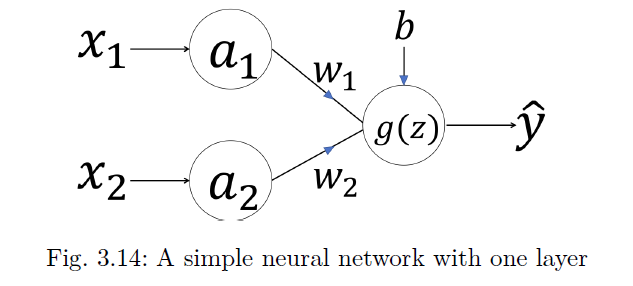

Now we formulate mathematical notation for a neural network. In Figure 3.16, we look at how values of layer $l$ are determined from layer $l-1, w^{l}, b^{l}$. We label the two layers as $l-1$ and $l$. Also notice that the general node in the left-hand layer is labelled $j$ and one in the right-hand layer, layer $l$, is labelled $j^{\prime}$. We want to calculate what value goes into the $j^{\prime t h}$ node of the $l^{\text {th }}$ layer. First multiply the value $a_{j}^{(l-1)}$ in the $j^{t h}$ node of the previous, $(l-1)^{t h}$ , layer by the parameter $w_{j, j^{\prime}}^{(l)}$ and then add another parameter $b_{j^{\prime}}^{(l)} .$ Then we add up all of these for every node in layer $l-1$. Let
$$
z_{j^{\prime}}^{(l)}=\sum_{j=1}^{J_{l-1}} w_{j, j^{\prime}}^{(l)} a_{j}^{(l-1)}+b_{j^{\prime}}^{(l)}
$$
where $J_{I}$ means the number of nodes in layer $l$. For a given activation function, $\sigma$, we end up with the following expression for the values in the next layer,
$$
a_{j^{\prime}}^{(l)}=\sigma\left(z_{j^{\prime}}^{(l)}\right)
$$
In matrix form,
$$
z^{(l)}=\mathbf{W}^{(l)} \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}
$$
with the matrix $\mathbf{W}^{(l)}$ containing all the multiplicative parameters, i.e. the weights $w_{j, j^{\prime}}^{(l)}$, and $\mathbf{b}^{(l)}$ is the bias. The bias is just the constant in the linear transformation.
$$
a^{(l)}=\sigma\left(\mathbf{z}^{(l)}\right)=\sigma\left(\mathbf{W}^{(l)} \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}\right)
$$

## Activation Functions

In neural networks, the activation function of a node abstracts the output of that node given an input or set of inputs for specific purposes for example, classification. In biological neural networks, the activation function may represent an electrical signal wether if the neuron fires. We use $\sigma$ to represent the activation functions. It will be the same for all nodes in a layer.
$$
a^{(l)}=\sigma\left(\mathbf{z}^{(l)}\right)=\sigma\left(\mathbf{W}^{(l)} \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}\right)
$$
Here we discuss a number of acitivation functions.


###  Step Function
$$
\sigma(x)= \begin{cases}0, & x < 0 \\ 1, & x \geq 0\end{cases}
$$
This is also called the Heaviside step function, or the unit step function, often represents a signal that switches on at a specified time and stays switched on indefinite. The step function can be use for classification problems.


###  ReLU Function
Positive linear/ReLU function is defined as
$$
\sigma(x)=\max (0, x)
$$
ReLU stands for Rectified Linear Units. It's one of the most commonly used activation function. The signal either passes through untouched or dies completely. It was found to enable better training of deeper networks compared to the widely used activation functions. Rectified linear units, compared to sigmoid function or similar activation functions, allow faster and effective training of deep neural architectures on large and complex datasets.


### Sigmoid
Sigmoid or logistic function
$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$
The logistic function finds applications in a range of fields, including biomathematics. The logistic sigmoid can be used in the output layer for predicting probability.


### Softmax Function
The softmax function converts a vector of numbers (an array of $K$ values $(z)$ ) into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector. It is thus a function that turns several numbers into quantities that can be perhaps interpreted as probabilities.
$$
\frac{e^{z_{k}}}{\sum_{k=1}^{K} e^{z_{k}}}
$$
It is often used in the final, output, layer of a neural network, especially with classification problems.

## Cost Function

In practice, we can use the least squares for a cost function. Since we will have a set of independent input data $y^{n}$ (from the training dataset) and corresponding output data $\hat{y}^{n}$ or the forecast output. $k$ is the $k$-th node of the output. We define the cost function as
$$
J=\frac{1}{2} \sum_{n=1}^{N} \sum_{K=1}^{K}\left(\hat{y}_{k}^{(n)}-y_{k}^{(n)}\right)^{2}
$$
For classification problems where only one output, the cost function commonly used for such an output is similar to logistic regression. And this is, for a binary classification $\left(y^{(n)}=0,1\right)$, the cost function is
$$
J=-\sum_{n=1}^{N}\left(y^{(n)} \ln \left(\hat{y}^{(n)}\right)+\left(1-y^{(n)}\right) \ln \left(1-\hat{y}^{(n)}\right)\right)
$$
This is related to the cross entropy function.


## Backpropagation

Back-propagation is the essence of neural network training. It is the practice of fine-tuning the weights of a neural network based on the error rate (i.e. loss) obtained in the previous iteration. Proper tuning of the weights ensures lower error rates, making the model reliable by increasing its generalization. We want to minimize the cost function, $J$, with respect to the parameters, the components of $\mathbf{W}$ and $\mathrm{b}$. To do that using gradient descent we are going to need the derivatives of $J$ with respect to each of those parameters. Here we focus the layer $l$ and node $j^{\prime}$ and node $j$ from layer $l-1$
$$
\frac{\partial J}{\partial w_{j, j^{\prime}}^{(l)}} \operatorname{and} \frac{\partial J}{\partial b_{j^{\prime}}^{(l)}}
$$
We introduce the quantity
$$
\delta_{j^{\prime}}^{(l)}=\frac{\partial J}{\partial z_{j^{\prime}}^{(l)}}
$$
From the chain rule again, we have
$$
\delta_{j}^{(l-1)}=\frac{\partial J}{\partial z_{j}^{(l-1)}}=\sum_{j^{\prime}} \frac{\partial J}{\partial z_{j^{\prime}}^{(l)}} \frac{\partial z_{j^{\prime}}^{(l)}}{\partial z_{j}^{(l-1)}}
$$
It follows that
$$
z_{j^{\prime}}^{(l)}=\sum_{j_{k}} w_{j_{k}, j^{\prime}}^{(l)} a_{j_{k}}^{(l-1)}+b_{j^{\prime}}^{(l)}=\sum_{j_{k}} w_{j_{k}, j^{\prime}}^{(l)} \sigma\left(z_{j_{k}}^{(l-1)}\right)+b_{j^{\prime}}^{(l)}
$$
In addition,
$$
\delta_{j}^{(l-1)}=\left.\frac{d g^{(l-1)}}{d z}\right|_{z_{j}^{(l-1)}} \sum_{j^{\prime}} \frac{\partial J}{\partial z_{j^{\prime}}^{(l)}} w_{j, j^{\prime}}^{(l)}=\left.\frac{d g^{(l-1)}}{d z}\right|_{z_{j}^{(l-1)}} \sum_{j^{\prime}} \delta_{j^{\prime}}^{(l)} w_{j, j^{\prime}}^{(l)}
$$
As a result, we can find the $\delta \mathrm{s}$ in a layer if we know the $\delta \mathrm{s}$ in all layers to the right. In summary, we have
$$
\frac{\partial J}{\partial w_{j, j^{\prime}}^{(l)}}=\frac{\partial J}{\partial z_{j^{\prime}}^{(l)}} \frac{\partial z_{j^{\prime}}^{(l)}}{\partial w_{j, j^{\prime}}^{(l)}}=\delta_{j^{\prime}}^{(l)} a_{j}^{(l-1)}
$$
Now the derivatives of the cost function, $J$, to the $w$ s can be written in terms of the $\delta \mathrm{s}$ which in turn are backpropagated from the network layers that are just to the right, one nearer the output. And the derivatives of the cost function to the bias, $b$ is quite simple,
$$
\frac{\partial J}{\partial b_{j^{\prime}}^{(l)}}=\delta_{j^{\prime}}^{(l)}
$$
It is clear that the derivatives of $J$ is depending on which activation function we use. If it is ReLU then the derivative is either zero or one. If we use the logistic function then we find that $\sigma^{\prime}(z)=\sigma(1-\sigma)$.

## Backpropagation Algorithm

From above analysis, we can easily derive the backpragation algorithm as follows. First we initialize weights and biases, typically at random. Then pick input data and input the vector $x$ into the left side of the network, and calculate all the $z_{s}, a_{s}$, etc. And finally calculate the output $\hat{y}$. We now can update the parameters by the (stochastic)gradient descent. Repeat the process until the desired accuracy is reached. For example,if using the quadratic cost function in one dimension, then
$$
\delta^{(L)}=\left.\frac{d g^{(L)}}{d z}\right|_{z_{j}^{(L)}}(\hat{y}-y)
$$
Continue to the left
$$
\delta_{j}^{(l-1)}=\left.\frac{d g^{(l-1)}}{d z}\right|_{z_{j}^{(l-1)}} \sum_{j} \delta_{j^{\prime}}^{(l)} w_{j, j^{\prime}}^{(l)}
$$
Then update the weights and biases using the following formulas.
New $w_{j, j^{\prime}}^{(l)}=$ Old $w_{j, j^{\prime}}^{(l)}-\beta \frac{\partial J}{\partial w_{j, j^{\prime}}^{(l)}}=\operatorname{Old} w_{j, j^{\prime}}^{(l)}-\beta \delta_{j^{\prime}}^{(l)} a_{j}^{(l-1)}$
and
New $b_{j^{\prime}}^{(l)}=\operatorname{Old} b_{j^{\prime}}^{(l)}-\beta \frac{\partial J}{\partial b_{j^{\prime}}^{(l)}}=\operatorname{Old} b_{j^{\prime}}^{(l)}-\beta \delta_{j^{\prime}}^{(l)}$

Combining all the above concepts, we can implement a neural network in Python. We use sigmoid as the activation function and mean squared error (MSE) as our cost function. The neural network employs 1 hidden layer and 3 neurons and aims to approximate the XOR function ([0,1,1,0]).

In [1]:
import numpy as np

# Activation Functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Derivative of sigmoid, assuming x is sigmoid(x)

# Cost Function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize Network Parameters
np.random.seed(42)
input_size = 2      # Input layer size
hidden_size = 3     # Hidden layer size
output_size = 1     # Output layer size
learning_rate = 0.1

# Randomly initialize weights and biases
weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)
bias_hidden = np.random.rand(hidden_size)
bias_output = np.random.rand(output_size)

# Forward Propagation
def forward_propagation(X):
    # Input to hidden layer
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    # Hidden to output layer
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    return hidden_output, final_output

# Backpropagation
def backpropagation(X, y, hidden_output, final_output):
    global weights_input_hidden, weights_hidden_output, bias_hidden, bias_output

    # Calculate error
    output_error = y - final_output
    output_delta = output_error * sigmoid_derivative(final_output)

    # Calculate error for hidden layer
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

# Training the Network
def train(X, y, epochs):
    for epoch in range(epochs):
        # Forward propagation
        hidden_output, final_output = forward_propagation(X)

        # Calculate loss (cost function)
        loss = mse_loss(y, final_output)
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

        # Backpropagation
        backpropagation(X, y, hidden_output, final_output)

# Example Data (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train the neural network
train(X, y, epochs=1000)

# Test the network
hidden_output, final_output = forward_propagation(X)
print("Predictions after training:")
print(final_output)


Epoch 0, Loss: 0.3861304348305651
Epoch 100, Loss: 0.25050750133454575
Epoch 200, Loss: 0.25037977780013326
Epoch 300, Loss: 0.25026397857545873
Epoch 400, Loss: 0.2501538256795917
Epoch 500, Loss: 0.2500449542266228
Epoch 600, Loss: 0.24993292094211644
Epoch 700, Loss: 0.24981284318646862
Epoch 800, Loss: 0.24967898503909336
Epoch 900, Loss: 0.24952425084252983
Predictions after training:
[[0.48896398]
 [0.49211393]
 [0.51224608]
 [0.5122697 ]]
